#Modules

In [1]:
import pandas as pd
import numpy as np
import gensim
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
import seaborn as sns
import spacy  # For preprocessing
import warnings
warnings.filterwarnings('ignore')
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [2]:
df=pd.read_csv('Base_Model_Final.csv') #target=likes_x

##caption

In [4]:
tokenized_caption = df['caption'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(tokenized_caption,
            size=250, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
)
model_w2v.train(tokenized_caption, total_examples= len(df['caption']), epochs=20)

WARNING - 12:09:22: consider setting layer size to a multiple of 4 for greater performance
INFO - 12:09:22: collecting all words and their counts
INFO - 12:09:22: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 12:09:22: collected 6718 word types from a corpus of 22620 raw words and 1000 sentences
INFO - 12:09:22: Loading a fresh vocabulary
INFO - 12:09:22: effective_min_count=2 retains 2933 unique words (43% of original 6718, drops 3785)
INFO - 12:09:22: effective_min_count=2 leaves 18835 word corpus (83% of original 22620, drops 3785)
INFO - 12:09:22: deleting the raw counts dictionary of 6718 items
INFO - 12:09:22: sample=0.001 downsamples 32 most-common words
INFO - 12:09:22: downsampling leaves estimated 18074 word corpus (96.0% of prior 18835)
INFO - 12:09:22: estimated required memory for 2933 words and 250 dimensions: 7332500 bytes
INFO - 12:09:22: resetting layer weights
INFO - 12:09:23: training model with 32 workers on 2933 vocabulary and 250 feature

(361380, 452400)

In [204]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [205]:
wordvec_arrays = np.zeros((len(tokenized_caption), 250)) 
for i in range(len(tokenized_caption)):
    wordvec_arrays[i,:] = word_vector(tokenized_caption[i], 250)
w2v_df_cap = pd.DataFrame(wordvec_arrays)
w2v_df_cap.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(1000, 250)

##hashtags

In [12]:
tokenized_hash = df['hashtags'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(tokenized_hash,
            size=250, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
)
model_w2v.train(tokenized_hash, total_examples= len(df['hashtags']), epochs=20)

WARNING - 12:13:54: consider setting layer size to a multiple of 4 for greater performance
INFO - 12:13:54: collecting all words and their counts
INFO - 12:13:54: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 12:13:54: collected 1373 word types from a corpus of 7062 raw words and 1000 sentences
INFO - 12:13:54: Loading a fresh vocabulary
INFO - 12:13:54: effective_min_count=2 retains 465 unique words (33% of original 1373, drops 908)
INFO - 12:13:54: effective_min_count=2 leaves 6154 word corpus (87% of original 7062, drops 908)
INFO - 12:13:54: deleting the raw counts dictionary of 1373 items
INFO - 12:13:54: sample=0.001 downsamples 104 most-common words
INFO - 12:13:54: downsampling leaves estimated 3738 word corpus (60.7% of prior 6154)
INFO - 12:13:54: estimated required memory for 465 words and 250 dimensions: 1162500 bytes
INFO - 12:13:54: resetting layer weights
INFO - 12:13:54: training model with 32 workers on 465 vocabulary and 250 features, using 

(74854, 141240)

In [13]:
wordvec_arrays_hash = np.zeros((len(tokenized_hash), 250)) 
for i in range(len(tokenized_hash)):
    wordvec_arrays_hash[i,:] = word_vector(tokenized_hash[i], 250)
w2v_df_hash = pd.DataFrame(wordvec_arrays_hash)
w2v_df_hash.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(1000, 250)

##mentions

In [14]:
tokenized_ment = df['mentions'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(tokenized_ment,
            size=250, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
)
model_w2v.train(tokenized_ment, total_examples= len(df['mentions']), epochs=20)

WARNING - 12:14:58: consider setting layer size to a multiple of 4 for greater performance
INFO - 12:14:58: collecting all words and their counts
INFO - 12:14:58: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 12:14:58: collected 343 word types from a corpus of 1209 raw words and 1000 sentences
INFO - 12:14:58: Loading a fresh vocabulary
INFO - 12:14:58: effective_min_count=2 retains 76 unique words (22% of original 343, drops 267)
INFO - 12:14:58: effective_min_count=2 leaves 942 word corpus (77% of original 1209, drops 267)
INFO - 12:14:58: deleting the raw counts dictionary of 343 items
INFO - 12:14:58: sample=0.001 downsamples 33 most-common words
INFO - 12:14:58: downsampling leaves estimated 213 word corpus (22.6% of prior 942)
INFO - 12:14:58: estimated required memory for 76 words and 250 dimensions: 190000 bytes
INFO - 12:14:58: resetting layer weights
INFO - 12:14:58: training model with 32 workers on 76 vocabulary and 250 features, using sg=1 hs=0 s

(4212, 24180)

In [15]:
wordvec_arrays_ment = np.zeros((len(tokenized_ment), 250)) 
for i in range(len(tokenized_caption)):
    wordvec_arrays_ment[i,:] = word_vector(tokenized_ment[i], 250)
w2v_dF_ment = pd.DataFrame(wordvec_arrays_ment)
w2v_dF_ment.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(1000, 250)

##emojis text

In [17]:
tokenized_emo = df['emoji_text'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(tokenized_emo,
            size=250, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
)
model_w2v.train(tokenized_emo, total_examples= len(df['emoji_text']), epochs=20)

WARNING - 12:17:20: consider setting layer size to a multiple of 4 for greater performance
INFO - 12:17:20: collecting all words and their counts
INFO - 12:17:20: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 12:17:20: collected 452 word types from a corpus of 4162 raw words and 1000 sentences
INFO - 12:17:20: Loading a fresh vocabulary
INFO - 12:17:20: effective_min_count=2 retains 304 unique words (67% of original 452, drops 148)
INFO - 12:17:20: effective_min_count=2 leaves 4014 word corpus (96% of original 4162, drops 148)
INFO - 12:17:20: deleting the raw counts dictionary of 452 items
INFO - 12:17:20: sample=0.001 downsamples 86 most-common words
INFO - 12:17:20: downsampling leaves estimated 2154 word corpus (53.7% of prior 4014)
INFO - 12:17:20: estimated required memory for 304 words and 250 dimensions: 760000 bytes
INFO - 12:17:20: resetting layer weights
INFO - 12:17:20: training model with 32 workers on 304 vocabulary and 250 features, using sg=1 

(42936, 83240)

In [18]:
wordvec_arrays_emo = np.zeros((len(tokenized_emo), 250)) 
for i in range(len(tokenized_emo)):
    wordvec_arrays_emo[i,:] = word_vector(tokenized_emo[i], 250)
w2v_df_emo = pd.DataFrame(wordvec_arrays_emo)
w2v_df_emo.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(1000, 250)

In [21]:
w2v_Df = pd.DataFrame(np.hstack((w2v_df_cap,w2v_df_hash,w2v_dF_ment,w2v_df_emo, df)))

In [131]:
for i in range(1000, 1024):
  print(w2v_Df[i])


0        0
1        1
2        2
3        3
4        4
      ... 
995    995
996    996
997    997
998    998
999    999
Name: 1000, Length: 1000, dtype: object
0      𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...
1      𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨  We grateful kind words feedback rec...
2      Hand dived Isle Jura scallop smoked roe leek c...
3      Jerusalem Artichoke prepared first dessert mal...
4      Main course seasonal  course menu: Borders Roe...
                             ...                        
995    Game set match  Our Centre Court Melting Ball ...
996    Don't worry bee happy  And enjoy Honey & White...
997    The Ramsbury Apricot Fizz partnership bee's kn...
998    Come enjoy mid-week dinner us  Make reservatio...
999                                       Ready service 
Name: 1001, Length: 1000, dtype: object
0      964.0
1      964.0
2      308.0
3      308.0
4      308.0
       ...  
995    117.0
996    117.0
997    117.0
998    117.0
999    117.0
Name: 1002, Length: 1000, dty

In [108]:
for col in w2v_Df.columns:
  print(type(col))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

In [ ]:
dropped = [1001,1017,1019,1021,1022]
w2v_df = w2v_Df.drop(dropped,axis=1)
w2v_df

In [136]:
from sklearn import preprocessing
df = pd.DataFrame(w2v_df)
data=df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)


In [184]:
w2v_df[1003] #likes_x

0       14.0
1       12.0
2      100.0
3       81.0
4      146.0
       ...  
995    152.0
996    263.0
997     54.0
998     82.0
999     86.0
Name: 1003, Length: 1000, dtype: object

In [185]:
y = w2v_df[1003]          #Target Variable
X = w2v_df.drop(1003,1)   #Feature Matrix
X=pd.DataFrame(X)
y=pd.DataFrame(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


 It seems like new version of xgboost do not accept the datatype of Object. So they should be converted to numeric

In [186]:
for i in X.columns:
  X[i]=pd.to_numeric(X[i])

In [187]:
for i in y.columns:
  y[i]=pd.to_numeric(y[i])

In [188]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [189]:
print(x_train.dtypes)

0       float64
1       float64
2       float64
3       float64
4       float64
         ...   
1016      int64
1018      int64
1020      int64
1023      int64
1024    float64
Length: 1019, dtype: object


#XGBoost

In [190]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


model = xgb.XGBRegressor()
parameters = {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

model_grid = GridSearchCV(model,parameters,cv = 2,n_jobs = 5, verbose=True)

model_grid.fit(x_train, y_train)

model_grid.best_score_
model_grid.best_params_

Fitting 2 folds for each of 9 candidates, totalling 18 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

In [191]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,silent=1,subsample=0.7)


In [192]:
xg_reg.fit(x_train, y_train)
y_pred = xg_reg.predict(x_test)

In [193]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

R2=r2_score(y_test,y_pred)
print("R2 Score: %f" % (R2))
print()

RMSE: 332.375626
R2 Score: 0.370226



In [194]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(20,20))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

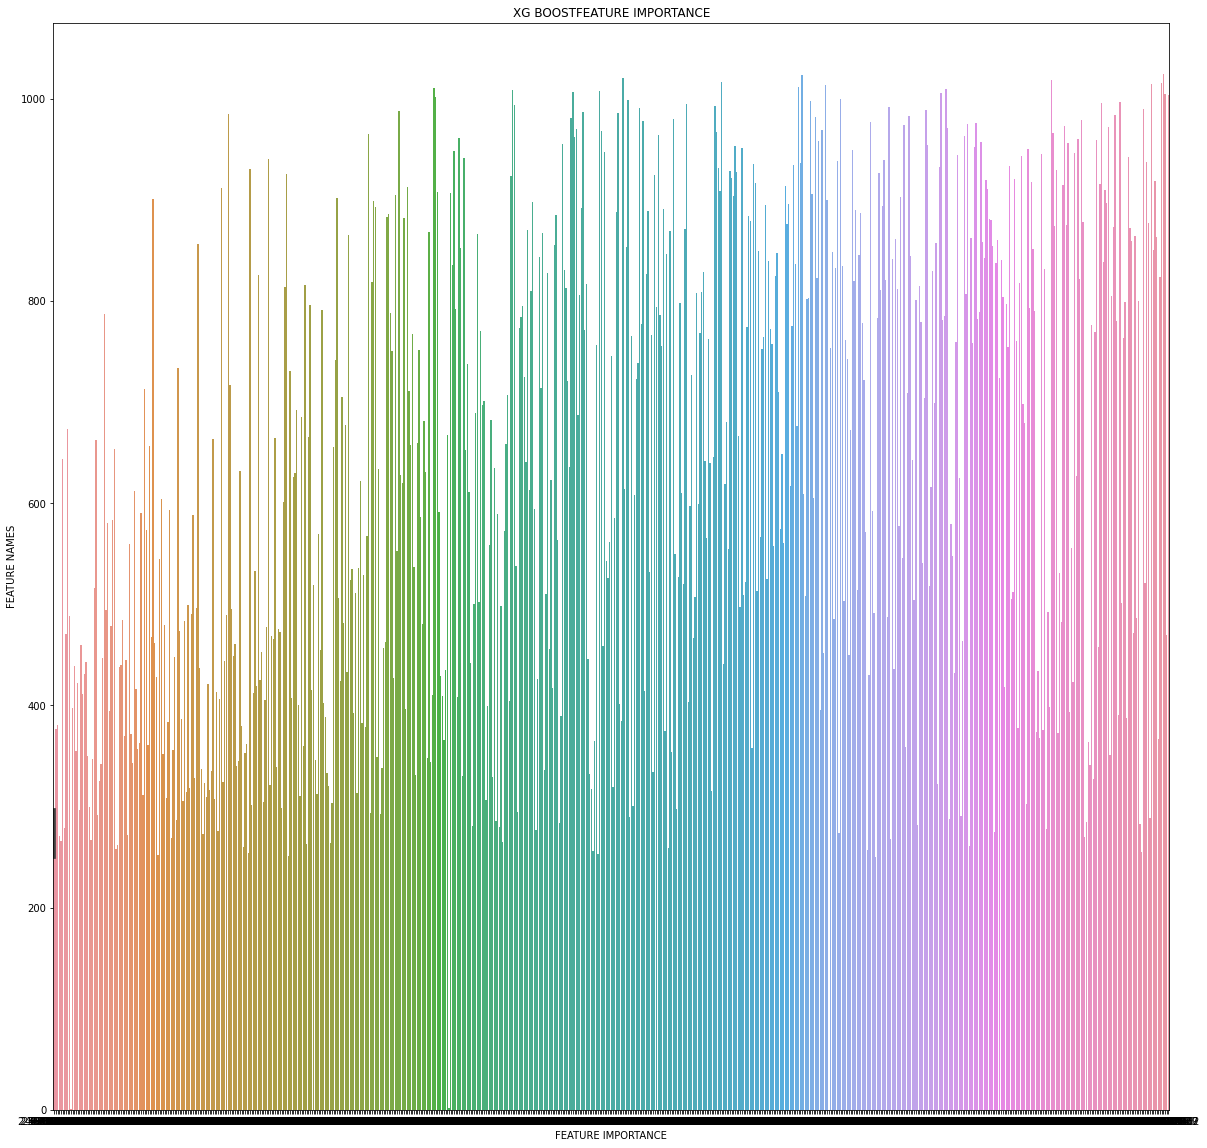

In [195]:
plot_feature_importance(xg_reg.feature_importances_,x_train.columns,'XG BOOST')

#Random Forest

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


model_rand = RandomForestRegressor()


n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}


rf_random = RandomizedSearchCV(estimator = model_rand,param_distributions = random_grid,n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)


rf_random.fit(x_train, y_train)

# model_rand.best_score_
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}  



In [197]:
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}  



In [202]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=100, min_samples_split=10 , min_samples_leaf=4, max_features='auto',max_depth=50,bootstrap=True)
rnd_clf.fit(x_train, y_train)
y_pred_rnd_clf = rnd_clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [199]:
y_pred_rnd_clf.shape

(200,)

In [203]:
mse=mean_squared_error(y_test, y_pred_rnd_clf)
print('MSE: %f' % (mse))
rmse_rnd = np.sqrt(mse)
print("RMSE: %f" % (rmse_rnd))

R2_rnd=r2_score(y_test,y_pred_rnd_clf)
print("R2 Score: %f" % (R2_rnd))


MSE: 108387.243460
RMSE: 329.222179
R2 Score: 0.382119


In [212]:
y_test

,1003
567,141.0
517,40.0
76,144.0
984,223.0
350,1194.0
...,...
90,49.0
7,84.0
365,1529.0
535,17.0


In [213]:
y_pred

array([ 110.437645 ,   83.98171  ,  211.48299  ,  113.0947   ,
       1164.4081   ,  164.2674   ,   41.70567  ,  262.28336  ,
        358.0363   ,  460.996    ,   92.71227  ,  224.88487  ,
        478.76355  ,  232.47089  ,  260.1191   ,   92.604294 ,
        649.26337  ,  152.37505  ,  490.8748   ,   15.0868225,
        534.3645   ,  350.66855  ,   73.960396 ,  578.27295  ,
        258.91312  ,  204.17897  ,   95.80257  ,  547.6965   ,
         14.830748 ,    9.646926 ,  418.14014  ,  530.512    ,
        348.4118   ,  102.39847  ,   41.326878 ,  105.86761  ,
         55.622784 ,   90.57695  ,  338.56348  ,   34.224426 ,
        593.7299   ,  296.76068  ,  122.176575 ,  595.4342   ,
         99.62556  ,  424.74768  ,   68.05941  ,   63.678833 ,
        561.21387  ,  145.7671   ,   10.505356 ,   44.60891  ,
         66.636826 ,  202.44211  ,   42.574146 ,   24.151007 ,
        310.24475  ,  231.38503  ,  168.32997  ,  107.339935 ,
         52.986057 ,  197.58253  ,   17.381649 ,  371.0

#SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)


# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:

grid_predictions = grid.predict(x_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))